
# Comparative Analysis of Machine Learning Models for Credit Card Fraud Detection

## Problem Statement
Credit card fraud detection remains a paramount concern for financial institutions globally. The objective of this project is to develop a sophisticated predictive model that leverages advanced machine learning techniques to accurately identify fraudulent transactions while minimizing the rate of false positives and false negatives. The goal is to enhance the security of credit card transactions by effectively distinguishing between legitimate and fraudulent activities, thereby reducing financial losses and maintaining customer trust. This model aims to achieve high accuracy in detection to ensure that genuine transactions proceed without interruption while promptly and accurately flagging fraudulent attempts.

## Real-World Significance
The real-world significance of this model lies in its capacity to safeguard consumers and banks from financial losses due to fraud. By accurately detecting fraudulent activities, it enhances transaction security, preserves customer trust, and supports the stability of the financial system by mitigating risks associated with credit card fraud.
    

## Data set Overview

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('creditcard.csv')

In [13]:
#Inspect
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Basic statistics for numerical columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning and Preprocessing

In [14]:
# Check for and handle missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print("Missing values in each column:")
print(missing_values)

# Handle missing values if there are any
# Fill missing values with the mean
df.fillna(df.mean(), inplace=True)

print("Shape of the dataset after handling missing values:")
print(df.shape)  # Corrected variable name here from df_cleaned to df

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Shape of the dataset after handling missing values:
(284807, 31)


In [15]:
# Feature engineering: scaling 'Amount' and transforming 'Time'
# Scale 'Amount' using StandardScaler
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Transform 'Time' from seconds to hours
df['Hour'] = df['Time'] / 3600 % 24

# Drop the original 'Time' and 'Amount' columns as we have created transformed versions of these columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Display the top 10 rows of the processed dataframe
print(df.head(10))

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0

## Exploratory Data Analysis

C:\Users\SUNYLoaner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUNYLoaner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


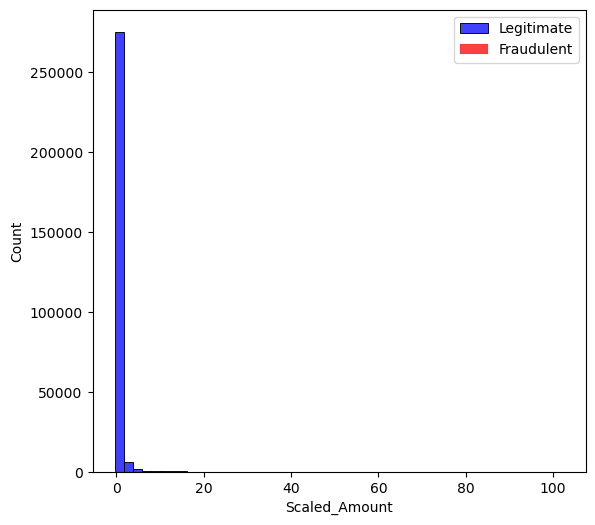

In [17]:

# Analyze distributions of 'Scaled_Amount' for fraudulent and legitimate transactions
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Scaled_Amount'], bins=50, color='blue', label='Legitimate')
sns.histplot(df[df['Class'] == 1]['Scaled_Amount'], bins=50, color='red', label='Fraudulent')
plt.legend()

C:\Users\SUNYLoaner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUNYLoaner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


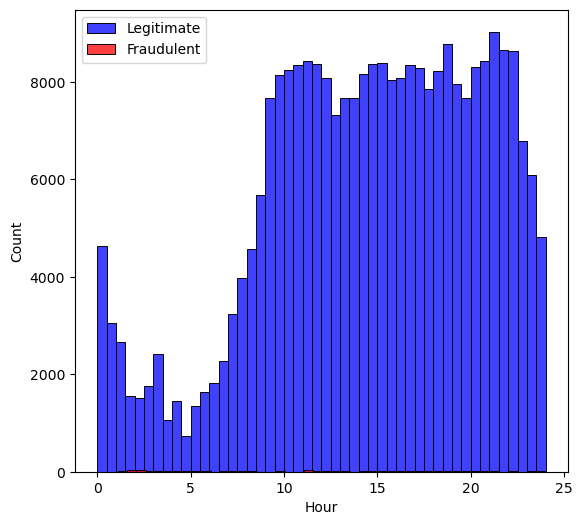

In [22]:
# Analyzing Distributions of 'Hour'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 0]['Hour'], bins=48, color='blue', label='Legitimate')
sns.histplot(df[df['Class'] == 1]['Hour'], bins=48, color='red', label='Fraudulent')
plt.legend()
plt.show()

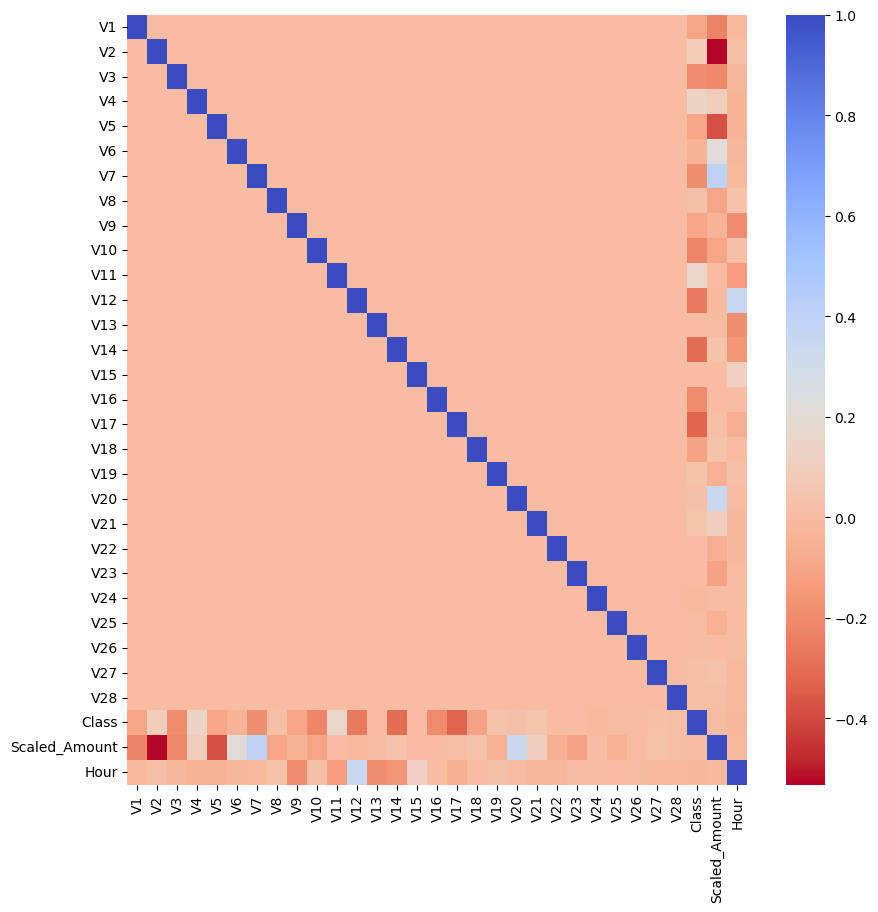

In [23]:
# Heatmap to show correlations
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm_r')
plt.show()

In [24]:
import pandas as pd

# Assuming df is your DataFrame and has been imported and prepared accordingly.

# Statistics for Scaled_Amount by Class
legit_amount_stats = df[df['Class'] == 0]['Scaled_Amount'].describe()
fraud_amount_stats = df[df['Class'] == 1]['Scaled_Amount'].describe()
print("Statistics for Scaled_Amount for Legitimate Transactions:")
print(legit_amount_stats)
print("\nStatistics for Scaled_Amount for Fraudulent Transactions:")
print(fraud_amount_stats)

# Statistics for Hour by Class
legit_hour_stats = df[df['Class'] == 0]['Hour'].describe()
fraud_hour_stats = df[df['Class'] == 1]['Hour'].describe()
print("\nStatistics for Hour for Legitimate Transactions:")
print(legit_hour_stats)
print("\nStatistics for Hour for Fraudulent Transactions:")
print(fraud_hour_stats)

# Correlation with Class
class_correlation = df.corr()['Class'].sort_values()
print("\nCorrelation of features with Class:")
print(class_correlation)


Statistics for Scaled_Amount for Legitimate Transactions:
count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Scaled_Amount, dtype: float64

Statistics for Scaled_Amount for Fraudulent Transactions:
count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Scaled_Amount, dtype: float64

Statistics for Hour for Legitimate Transactions:
count    284315.000000
mean         14.542106
std           5.844597
min           0.000000
25%          10.601389
50%          15.014167
75%          19.332778
max          23.999444
Name: Hour, dtype: float64

Statistics for Hour for Fraudulent Transactions:
count    492.000000
mean      12.136986
std        6.719614
min        0.112778
25%        5.923819
50%       12.052361
75%       17.803681
max       23.993

### Scaled Amount Distribution:
The statistics and histograms for Scaled Amount reveal key differences between legitimate and fraudulent transactions. Legitimate transactions predominantly cluster around a mean close to zero and have a tight spread, indicated by a standard deviation near one. Fraudulent transactions, although fewer, show a higher average and a wider standard deviation, suggesting more variability and higher amounts on average. The histograms likely depict legitimate transactions as more densely populated around the median, whereas fraudulent ones are more spread out, with some reaching higher values. These insights can help in distinguishing fraudulent from legitimate transactions using amount scaling as a feature.

### Hour Distribution:
The statistics for the `Hour` feature show differences in the patterns of legitimate and fraudulent transactions throughout the day. Legitimate transactions peak around midday to late evening, with an average around 14:33 (2:33 PM) and are more consistently distributed as suggested by a lower standard deviation. Fraudulent transactions have a broader time distribution, with a lower average hour of 12:08 PM and a higher standard deviation, indicating a less predictable pattern. This wider spread in fraudulent transaction times and the slightly earlier mean time could be indicative of fraudsters operating at less typical banking hours, potentially to avoid detection. These insights are valuable for developing features in fraud detection systems that consider transaction timing behavior.

### Correlation with Class:
The listed correlation coefficients show how each feature relates to the Class (where fraudulent transactions are assumed to be marked by 1). Features of V17, V14, V12, and V10 are highly inversely correlated and hence show that higher values in these features represent legit transactions, while lower values of those features represent more prone cases towards fraud. On the other hand, features V11, V4, and V2 show positive correlations with Class, meaning that higher values within these features of the independent variables are just giving possible tendencies of fraud. Particularly, features such as Hour, V24, and others with a near-zero correlation have a very minimal direct linear relationship with fraud.

This indicates that even though some features can be very helpful in discriminating among the classes, others may not be so if used singly. 

## Model Training

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)  
}

# Dictionary to keep track of metrics
model_metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store metrics
    model_metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
    
    # Display classification report and confusion matrix
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Logistic Regression Confusion Matrix:
[[56851    13]
 [   34    64]]

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix:
[[56859     5]
 [   17    81]]

Training Decision Tree...
Decision Tree Classification Report:
           

## Comparision

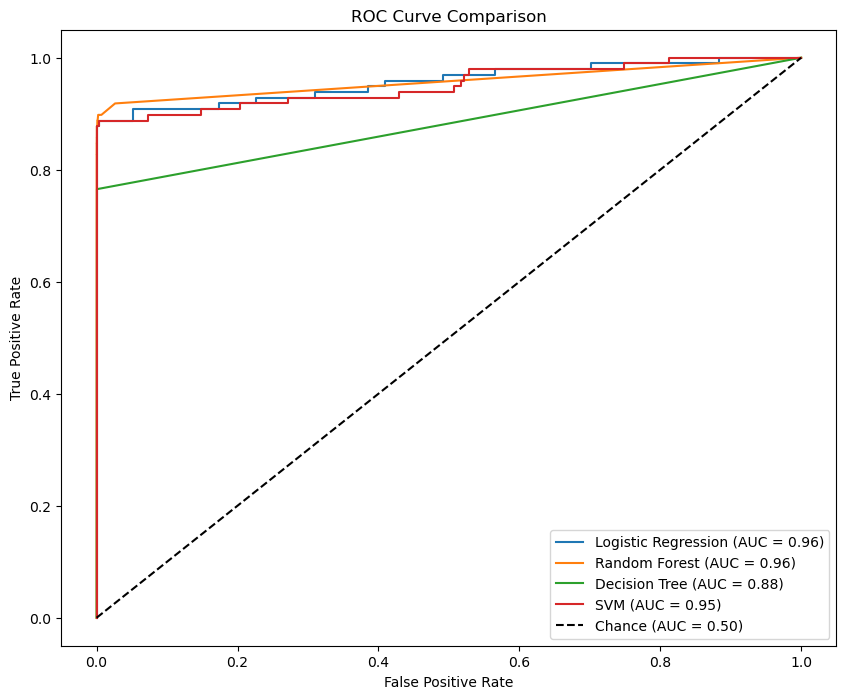

Model Performance Comparison:

Logistic Regression Performance:
Accuracy: 0.9992
Precision: 0.8312
Recall: 0.6531
F1 Score: 0.7314
ROC AUC: 0.9564

Random Forest Performance:
Accuracy: 0.9996
Precision: 0.9419
Recall: 0.8265
F1 Score: 0.8804
ROC AUC: 0.9577

Decision Tree Performance:
Accuracy: 0.9991
Precision: 0.7282
Recall: 0.7653
F1 Score: 0.7463
ROC AUC: 0.8824

SVM Performance:
Accuracy: 0.9994
Precision: 0.8387
Recall: 0.7959
F1 Score: 0.8168
ROC AUC: 0.9513


In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Setup figure for plotting
plt.figure(figsize=(10, 8))

# Plot ROC Curve for all models
for model_name, model in models.items():
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)  # Calculate area under the curve
    
    # Plot
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# Compare model performance
print("Model Performance Comparison:")
for model_name, metrics in model_metrics.items():
    print(f"\n{model_name} Performance:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")


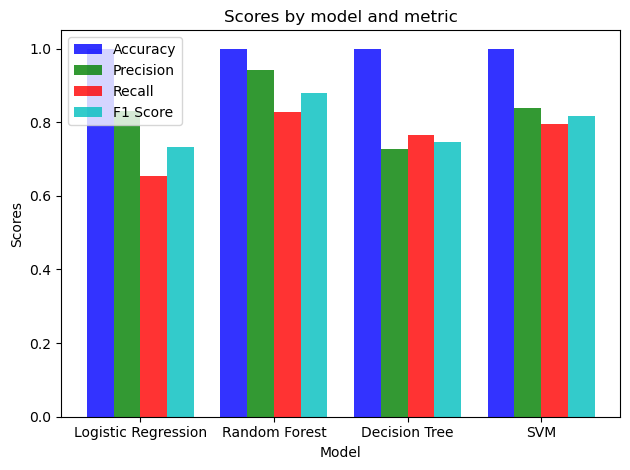

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
n_groups = len(models)

# Data preparation
accuracy = [model_metrics[model]['Accuracy'] for model in models]
precision = [model_metrics[model]['Precision'] for model in models]
recall = [model_metrics[model]['Recall'] for model in models]
f1_score = [model_metrics[model]['F1 Score'] for model in models]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = ax.bar(index, accuracy, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = ax.bar(index + bar_width, precision, bar_width, alpha=opacity, color='g', label='Precision')
rects3 = ax.bar(index + 2 * bar_width, recall, bar_width, alpha=opacity, color='r', label='Recall')
rects4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, alpha=opacity, color='c', label='F1 Score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models.keys())
ax.legend()

plt.tight_layout()
plt.show()




### Conclusion

**Random Forest:**
R- Random Forest exhibits the highest performance across most metrics. It achieves the highest accuracy (0.9996), precision (0.9419), recall (0.8265), and F1 score (0.8804). Its ROC AUC score (0.9577) is also competitive, indicating strong discriminatory power. Random Forest demonstrates robustness against overfitting and presents high precision, reducing the likelihood of false positives. Its main drawback lies in computational complexity, potentially leading to longer training times and larger models.

**Logistic Regression:**
   Logistic Regression achieves high accuracy (0.9992), though with lower precision (0.8312) and recall (0.6531) compared to Random Forest. Its F1 score (0.7314) and ROC AUC score (0.9564) are competitive but slightly lower. Logistic Regression offers computational efficiency and interpretability, making it suitable for cases where model transparency is crucial. It tends to underperform in recall compared to Random Forest, resulting in a higher number of false negatives.

**Decision Tree:**
   Decision Tree shows lower accuracy (0.9991), precision (0.7282), and F1 score (0.7463), with a slightly higher recall (0.7653) compared to Logistic Regression. Its ROC AUC score (0.8824) is notably lower.Decision Trees are interpretable and easy to visualize, aiding in understanding feature importance and decision paths. Prone to overfitting, Decision Trees often exhibit lower precision and ROC AUC scores, making them less effective for fraud detection tasks.

**SVM:**
   SVM performs well with high accuracy (0.9994) and competitive precision (0.8387), recall (0.7959), and F1 score (0.8168). Its ROC AUC score (0.9513) indicates strong discriminatory power. SVM offers high accuracy and is effective in high-dimensional spaces, making it suitable for complex datasets.

**Best Suited Model:**
Considering the need for high accuracy, precision, and recall in fraud detection, the **Random Forest** model emerges as the most suitable option. Its ability to maintain high performance across all metrics, robustness against overfitting, and strong precision make it invaluable for sensitive tasks like fraud detection.

**Least Suited Model:**
The **Decision Tree** model, although interpretable, exhibits lower overall performance metrics and is prone to overfitting, making it less suitable for fraud detection compared to Random Forest.

In conclusion, while Logistic Regression and SVM also offer competitive performance, the Random Forest model stands out as the optimal choice for its superior balance of accuracy, precision, and recall in fraud detection tasks.call in fraud detection tasks.